In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from funkwpap import *
import sympy as sp, pandas as pd, numpy as np, tqdm, time, sys, matplotlib.pyplot as plt, tqdm
from statistics import mean
from scipy.optimize import fsolve
from random import random


In [2]:
x = sp.symbols('x')
cap = 2000 # total emission cap
Regulator22 = Regulator("test1", permit_price = 2.4079, emission_cap = cap)
sector1 = Sector('cement', price_demand_function= 100 - 0.1*x, free_emission_multiplier= 0, regulator= Regulator22)
sector2 = Sector('steel', price_demand_function=150 - 0.1*x, free_emission_multiplier= 0, regulator= Regulator22)
sector3 = Sector('paper', price_demand_function= 200 - 0.02*x**1.5, free_emission_multiplier= 0, regulator= Regulator22)
country1 = Country('DE', 1, regulator= Regulator22)
country2 = Country('FI', 0.5, regulator= Regulator22)
country3 = Country('GR', size= 0.1, regulator= Regulator22)

# Create Firms using objects
firm1 = Firm('firm1', 1, 1, x*0, 10*x+ 2*x**2 + 2*x**3 , 0, 0, 0, regulator= Regulator22)
firm2 = Firm('firm2', 1, 2, x*0, 11*x+ 3*x**2 + 2*x**3, 0, 0, 0, regulator= Regulator22)
firm3 = Firm('firm3', 1, 3, x*0, 5*x+ 4*x**2 + 5*x**3 , 0, 0, 0, regulator= Regulator22)
firm4 = Firm('firm4', 2, 1, x*0, 7*x+ 5*x**2 + 3*x**3 , 0, 0, 0, regulator= Regulator22)
firm5 = Firm('firm5', 2, 2, x*0, 1*x+ 6*x**2 + 2*x**3 , 0, 0, 0, regulator= Regulator22)
firm6 = Firm('firm6', 2, 3, x*0, 2*x+ 7*x**2 + 3*x**3 , 0, 0, 0, regulator= Regulator22)
firm7 = Firm('firm7', 3, 1, x*0, 3*x+ 8*x**2 + 4*x**3 , 0, 0, 0, regulator= Regulator22)
firm8 = Firm('firm8', 3, 2, x*0, 4*x+ 9*x**2 + 10*x**3 , 0, 0, 0, regulator= Regulator22)
firm9 = Firm('firm9', 3, 3, x*0, 5*x+ 10*x**2 + 11*x**3 , 0, 0, 0, regulator= Regulator22)



In [3]:
Regulator22.BAU_calculator()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-14


In [ ]:
# Define the percentages of BAU emissions
bau_percentages = [0.7, 0.8, 0.9]

# Initialize dictionaries to store results for each percentage
results = {perc: {
    'profits1': [], 'profits2': [], 'abatements1': [], 'abatements2': [],
    'permits1': [], 'permits2': [], 'trades1': [], 'trades2': [],
    'revenews1': [], 'revenews2': [], 'permit_price': [],
    'outputs1': [], 'outputs2': [], 'emissions1': [], 'emissions2': []
} for perc in bau_percentages}

# Loop over each percentage
for perc in bau_percentages:
    Regulator22.emission_cap = Regulator22.BAU_emissions * perc
    frees = np.linspace(0, 1, 100)

    for free in tqdm.tqdm(frees):
        sector1.free_emission_multiplier = free
        Regulator22.optimization_concave_formulation_ab()
        print(f"{free}: {Regulator22.equilibrium_tester(output=True)}")

        for firm in Regulator22.firm_registry.values():
            firm.calculate_profit_components()

        results[perc]['profits1'].append(mean(float(i.profit) for i in sector1.firms))
        results[perc]['profits2'].append(mean(float(i.profit) for i in sector2.firms + sector3.firms))
        results[perc]['abatements1'].append(mean(float(i.abatement) for i in sector1.firms))
        results[perc]['abatements2'].append(mean(float(i.abatement) for i in sector2.firms + sector3.firms))
        results[perc]['permits1'].append(mean(float(i.permits_used) for i in sector1.firms))
        results[perc]['permits2'].append(mean(float(i.permits_used) for i in sector2.firms + sector3.firms))
        results[perc]['trades1'].append(mean(float(i.permits_costs) for i in sector1.firms))
        results[perc]['trades2'].append(mean(float(i.permits_costs) for i in sector2.firms + sector3.firms))
        results[perc]['revenews1'].append(mean(float(i.sales) for i in sector1.firms))
        results[perc]['revenews2'].append(mean(float(i.sales) for i in sector2.firms + sector3.firms))
        results[perc]['permit_price'].append(Regulator22.permit_price)
        results[perc]['outputs1'].append(mean(float(i.actual_output) for i in sector1.firms))
        results[perc]['outputs2'].append(mean(float(i.actual_output) for i in sector2.firms + sector3.firms))
        results[perc]['emissions1'].append(mean(float(i.emission) for i in sector1.firms))
        results[perc]['emissions2'].append(mean(float(i.emission) for i in sector2.firms + sector3.firms))



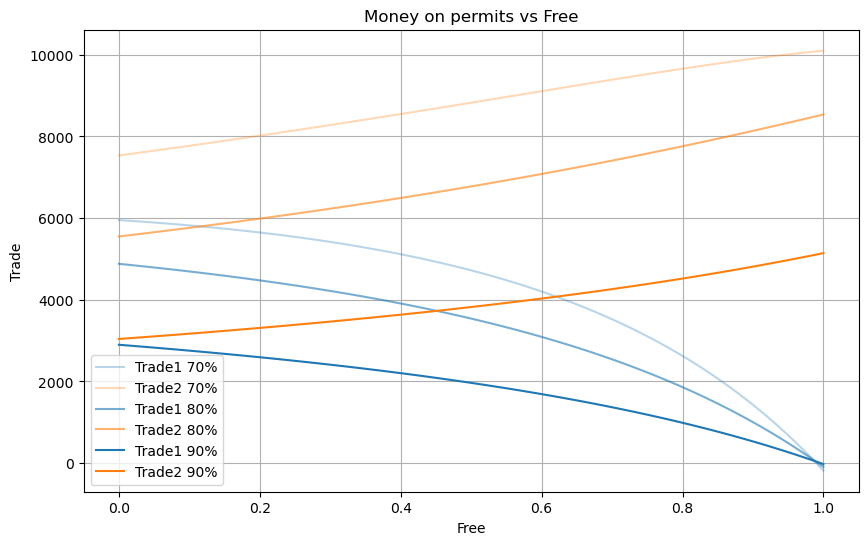

In [16]:
# Define colors and transparency levels
colors = {0.7: 'blue', 0.8: 'green', 0.9: 'red'}
alphas = {0.7: 0.3, 0.8: 0.6, 0.9: 1.0}

# Plot trades1 and trades2 with respect to frees
plt.figure(figsize=(10, 6))
for perc in [0.7, 0.8, 0.9]:
    plt.plot(frees, results[perc]['trades1'], label=f'Trade1 {perc*100:.0f}%', color='#1f77b4', alpha=alphas[perc])
    plt.plot(frees, results[perc]['trades2'], label=f'Trade2 {perc*100:.0f}%', color='#ff7f0e', alpha=alphas[perc])
plt.xlabel('Free')
plt.ylabel('Trade')
plt.title('Money on permits vs Free')
plt.legend()
plt.grid()
plt.show()


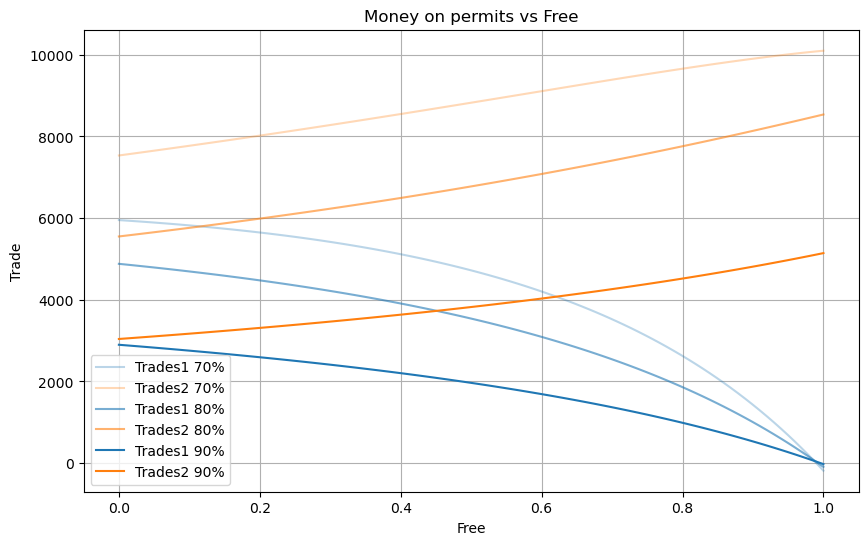

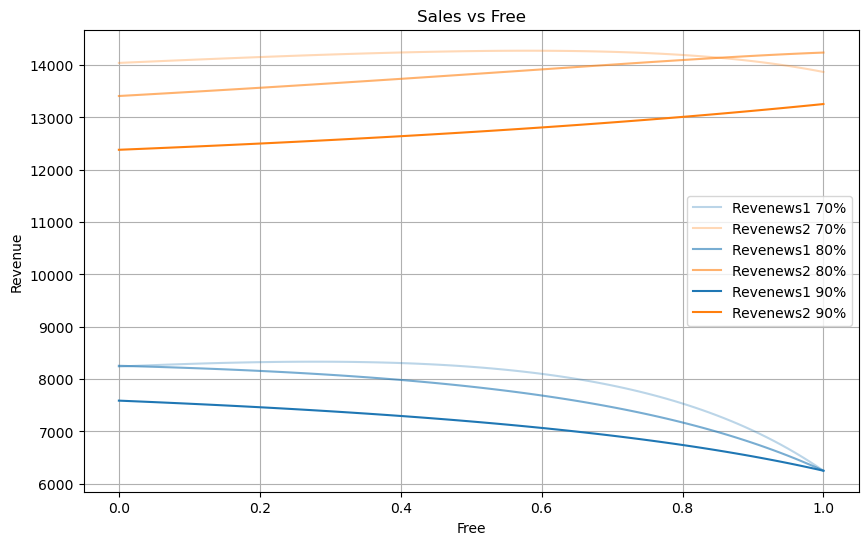

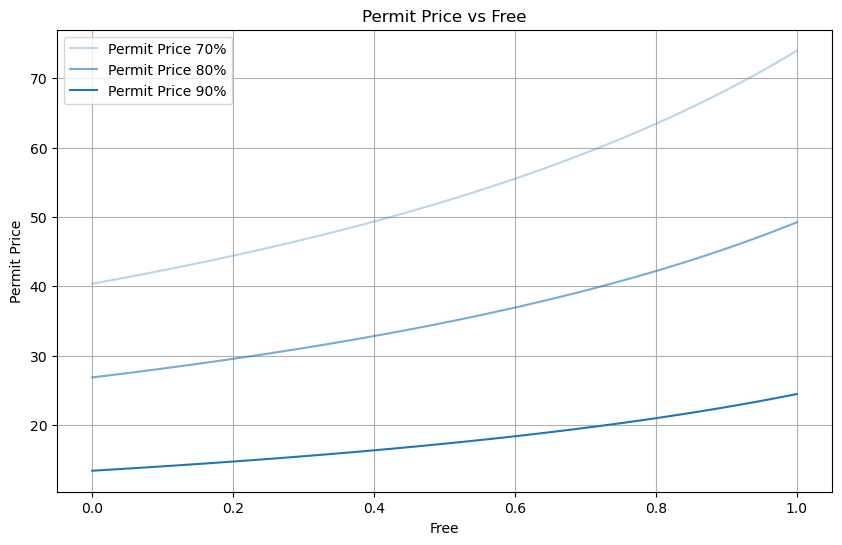

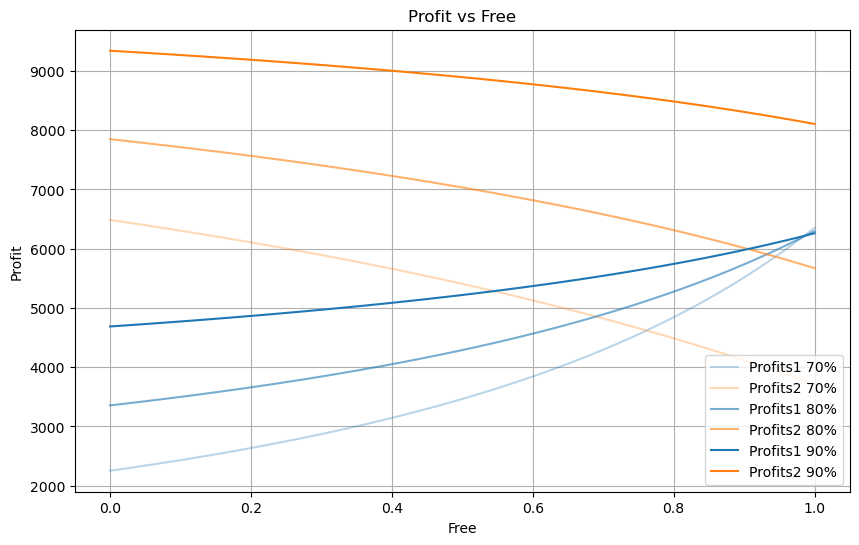

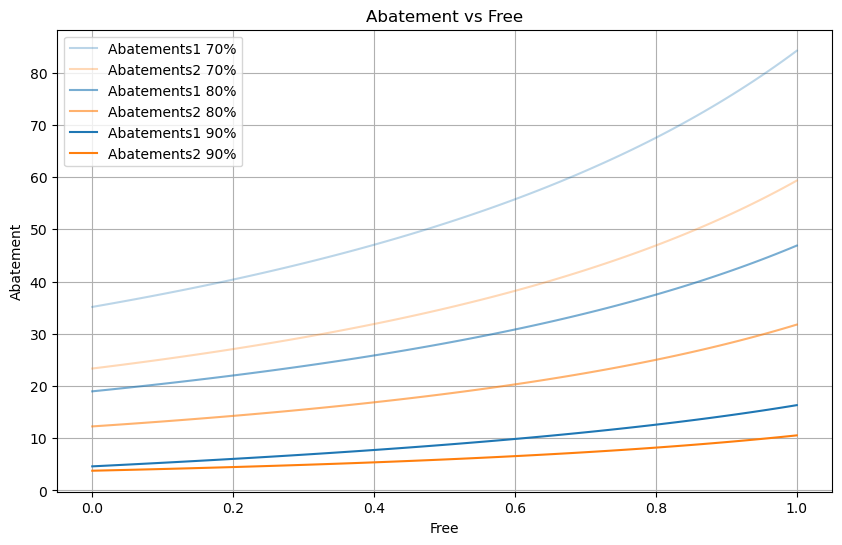

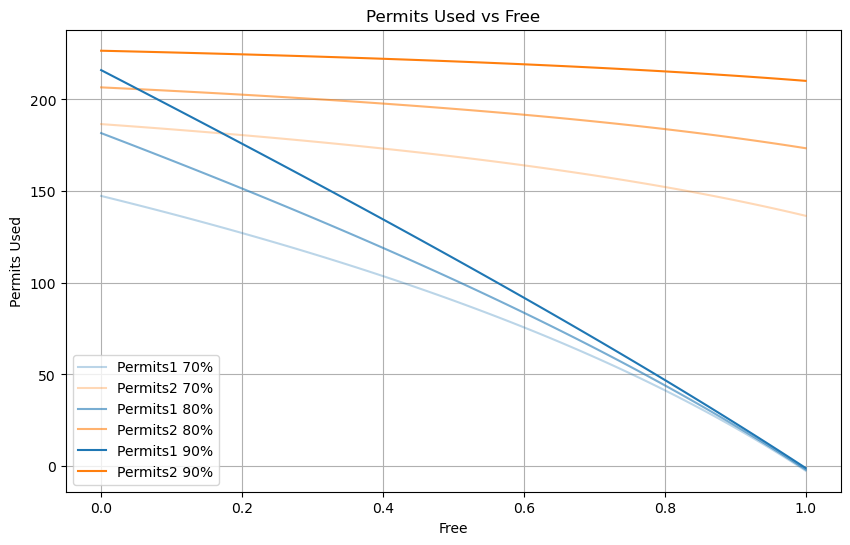

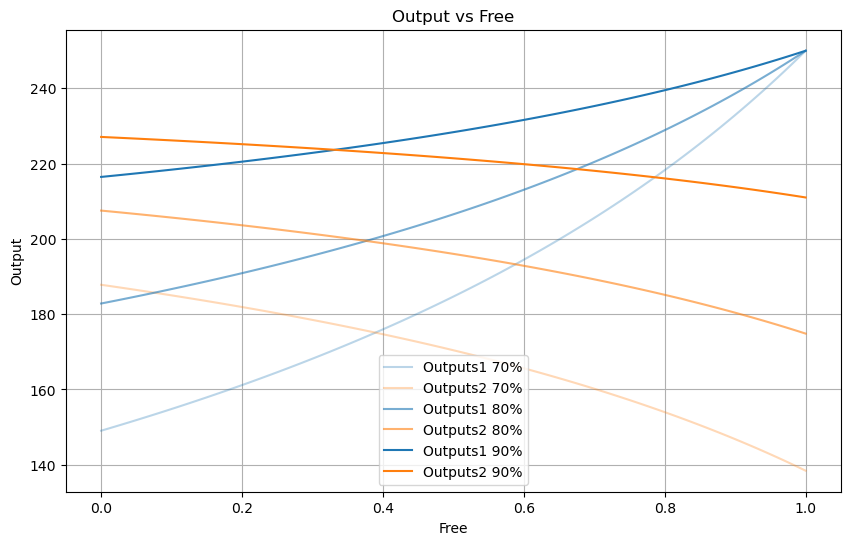

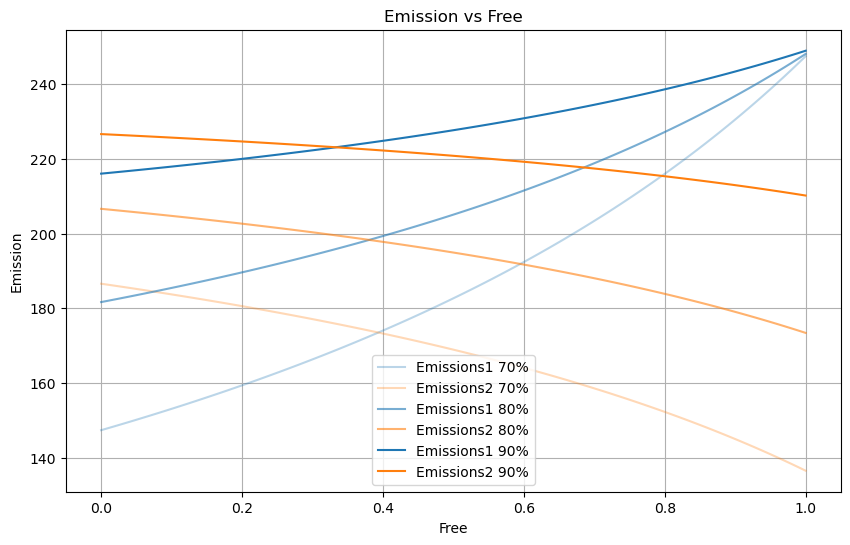

In [17]:
# Define colors and transparency levels
colors = {'trades1': '#1f77b4', 'trades2': '#ff7f0e'}
alphas = {0.7: 0.3, 0.8: 0.6, 0.9: 1.0}

# Define a function to plot the metrics
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(10, 6))
    for perc in [0.7, 0.8, 0.9]:
        plt.plot(frees, results[perc][f'{metric}1'], label=f'{metric.capitalize()}1 {perc*100:.0f}%', color=colors['trades1'], alpha=alphas[perc])
        plt.plot(frees, results[perc][f'{metric}2'], label=f'{metric.capitalize()}2 {perc*100:.0f}%', color=colors['trades2'], alpha=alphas[perc])
    plt.xlabel('Free')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plot trades
plot_metric('trades', 'Trade', 'Money on permits vs Free')

# Plot revenues
plot_metric('revenews', 'Revenue', 'Sales vs Free')

# Plot permit prices
plt.figure(figsize=(10, 6))
for perc in [0.7, 0.8, 0.9]:
    plt.plot(frees, results[perc]['permit_price'], label=f'Permit Price {perc*100:.0f}%', color=colors['trades1'], alpha=alphas[perc])
plt.xlabel('Free')
plt.ylabel('Permit Price')
plt.title('Permit Price vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot profits
plot_metric('profits', 'Profit', 'Profit vs Free')

# Plot abatements
plot_metric('abatements', 'Abatement', 'Abatement vs Free')

# Plot permits used
plot_metric('permits', 'Permits Used', 'Permits Used vs Free')

# Plot outputs
plot_metric('outputs', 'Output', 'Output vs Free')

# Plot emissions
plot_metric('emissions', 'Emission', 'Emission vs Free')